In [70]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
statsf = [i for i in os.listdir() if i.endswith(".stats")]
names = [int(s.replace("simlord-", "").replace("_phased.stats", "")) for s in statsf]

### Stats features
Index(['#sample', 'chromosome', 'file_name', 'variants', 'phased', 'unphased',
       'singletons', 'blocks', 'variant_per_block_median',
       'variant_per_block_avg', 'variant_per_block_min',
       'variant_per_block_max', 'variant_per_block_sum', 'bp_per_block_median',
       'bp_per_block_avg', 'bp_per_block_min', 'bp_per_block_max',
       'bp_per_block_sum', 'heterozygous_variants', 'heterozygous_snvs',
       'phased_snvs', 'block_n50'],
      dtype='object')

In [68]:
def get_feature_from_stats(statsfs, feature):
    output = []
    try:
        for stats in statsfs:
            df = pd.read_csv(stats, sep="\t")
            output.append(df[df.chromosome == "ALL"][feature].item())
    except KeyError:
        sys.stderr.write("No such column.")
    return output

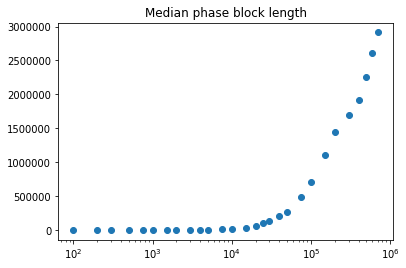

In [65]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "bp_per_block_median"))
plt.title("Median phase block length")
plt.xscale('log')

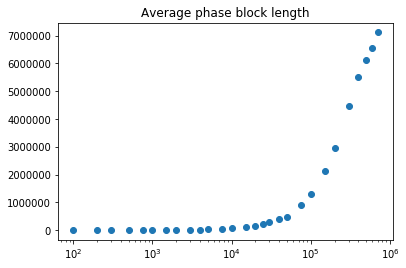

In [72]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "bp_per_block_avg"))
plt.title("Average phase block length")
plt.xscale('log')

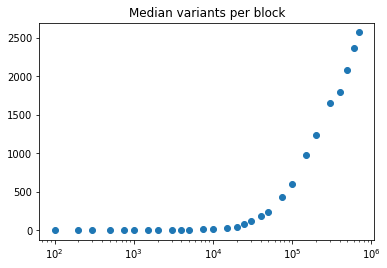

In [64]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "variant_per_block_median"))
plt.title("Median variants per block")
plt.xscale('log')

Text(0.5, 1.0, 'Number of phased variants')

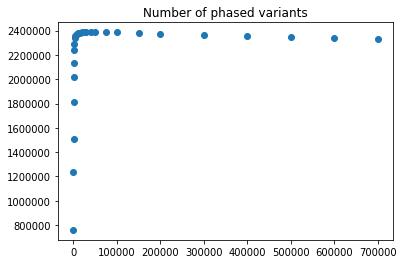

In [32]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "phased_snvs"))
plt.title("Number of phased variants")

In [56]:
list(zip(names, get_feature_from_stats(statsf, "phased_snvs")))

[(200000, 2375883),
 (10000, 2378603),
 (100000, 2385623),
 (40000, 2386503),
 (500, 1815271),
 (4000, 2352598),
 (750, 2018355),
 (600000, 2336448),
 (20000, 2384798),
 (1500, 2243756),
 (400000, 2354354),
 (2000, 2293805),
 (75000, 2385782),
 (1000, 2132000),
 (500000, 2345275),
 (300, 1507007),
 (150000, 2381701),
 (100, 759584),
 (700000, 2331643),
 (300000, 2364205),
 (200, 1236021),
 (15000, 2383290),
 (7500, 2373453),
 (30000, 2385803),
 (25000, 2385660),
 (5000, 2361950),
 (3000, 2335881),
 (50000, 2386472)]

In [62]:
df = pd.DataFrame(data=list(zip(names, get_feature_from_stats(statsf, "phased_snvs"))),
                  columns=["lengths", "phased_snvs"]) \
            .sort_values(by="lengths")

Text(0.5, 1.0, 'Phase block N50')

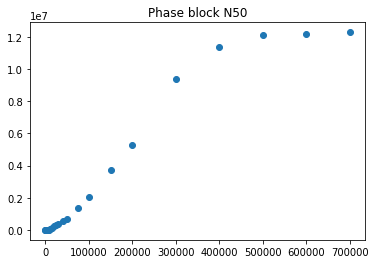

In [33]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "block_n50"))
plt.title("Phase block N50")

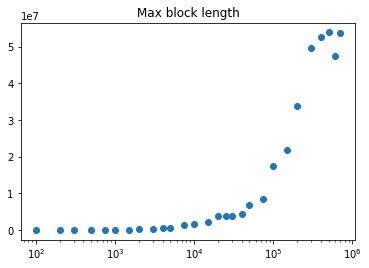

In [74]:
plt.scatter(x=names, y=get_feature_from_stats(statsf, "bp_per_block_max"))
plt.title("Max block length")
plt.xscale('log')